In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

# Creating a Dataset

In [3]:
years = np.arange(1990, 2021)
income_values = []
for year in years:
  income_values.append(35000 + 500 * (year - 1990)) # Data should have a clear pattern at each var,
  # Only then it will work. No random, or even exponetial curve data.
  # It's best if data follows a trend
  # Linear data is only type of data this model is good at,
  # linear data with noise maybe but we have better types of models for that.
  # No other

df = pd.DataFrame({ 'years': years, "income": income_values })
df.head()

,years,income
0,1990,35000
1,1991,35500
2,1992,36000
3,1993,36500
4,1994,37000


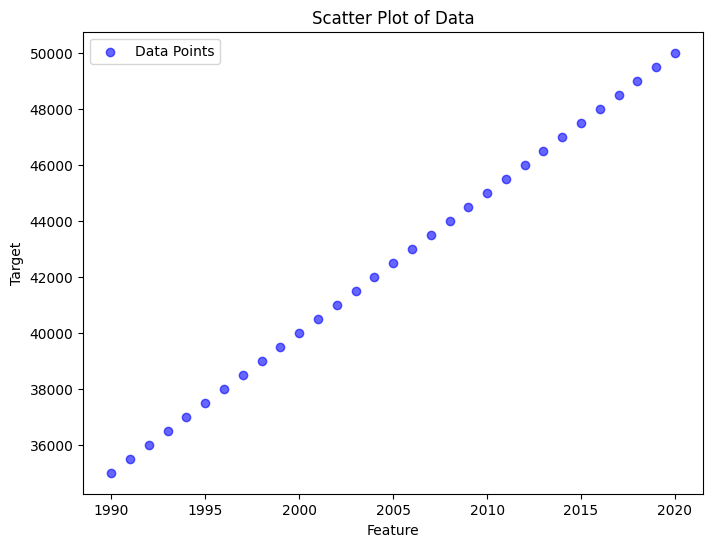

In [4]:
# @title years vs income

plt.figure(figsize=(8, 6))
plt.scatter(years, income_values, color='blue', alpha=0.6, label='Data Points')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

In [5]:
years = df.drop('income', axis='columns')
years.head()

,years
0,1990
1,1991
2,1992
3,1993
4,1994


In [6]:
model = linear_model.LinearRegression()
model.fit(years, df.drop('years', axis='columns'))

LinearRegression()

In [7]:
model.predict([[2022]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[51000.]])

# Testing the Model

In [8]:
test_data = { 'years': [1990, 1991, 1992, 1993, 1994, 2021, 2021, 2023, 2024, 2025]}
test_df = pd.DataFrame(test_data)

predicted_income = model.predict(test_df)
predicted_income

array([[35000.],
       [35500.],
       [36000.],
       [36500.],
       [37000.],
       [50500.],
       [50500.],
       [51500.],
       [52000.],
       [52500.]])

# Scoring the Model

In [9]:
score_year_data = { 'years': [1990, 1991, 1992, 1993, 1994]}
score_income_data = { 'income': [35000, 35500, 36000, 36500, 37000]}

score_year_df = pd.DataFrame(score_year_data)
score_income_df = pd.DataFrame(score_income_data)

y_pred = model.score(score_year_df, score_income_df)
y_pred

1.0

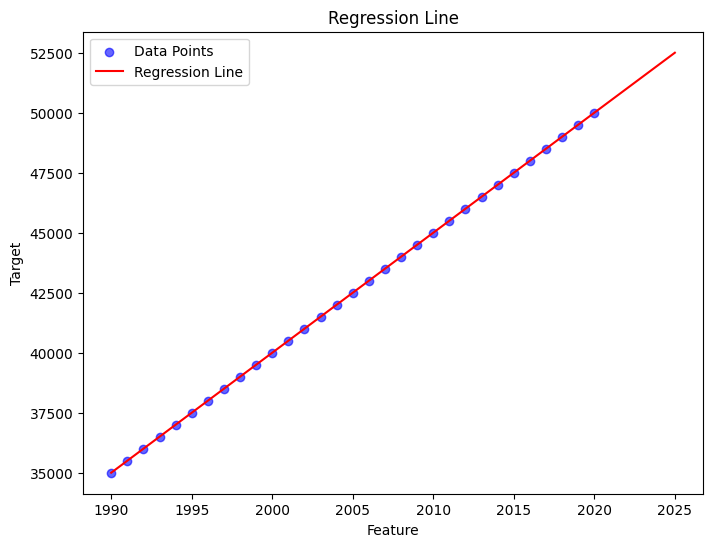

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(years, income_values, color='blue', alpha=0.6, label='Data Points')
plt.plot(test_df, predicted_income, color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Regression Line')
plt.legend()
plt.show()

In [15]:
model.coef_[0][0]

499.9999999999998

In [16]:
model.intercept_[0]

-959999.9999999995